In [1]:
import csv
import pandas as pd
from pandas import DataFrame
from rdflib import Graph as RDFGraph
from rdflib.extras.external_graph_libs import rdflib_to_networkx_graph
import networkx as nx
from networkx import Graph as NXGraph
import matplotlib.pyplot as plt
import statistics
import collections
import os

In [2]:
df_wiki_info = pd.read_csv('yagoWikipediaInfo_fa.tsv', sep='\t')
          
G = nx.Graph()

df = DataFrame(columns={'subject', 'predicate', 'object'})
    
for i in range (5000):
#for i in range (len(df_wiki_info)):
    
    row = df_wiki_info.iloc[i, :]
    G.add_edge(row[1], row[3])
    G[row[1]][row[3]]['predicate'] = row[2]
    #df = df.append([{ 'subject': row[1], 'predicate': row[2], 'object': row[3]}])
    #print(i)

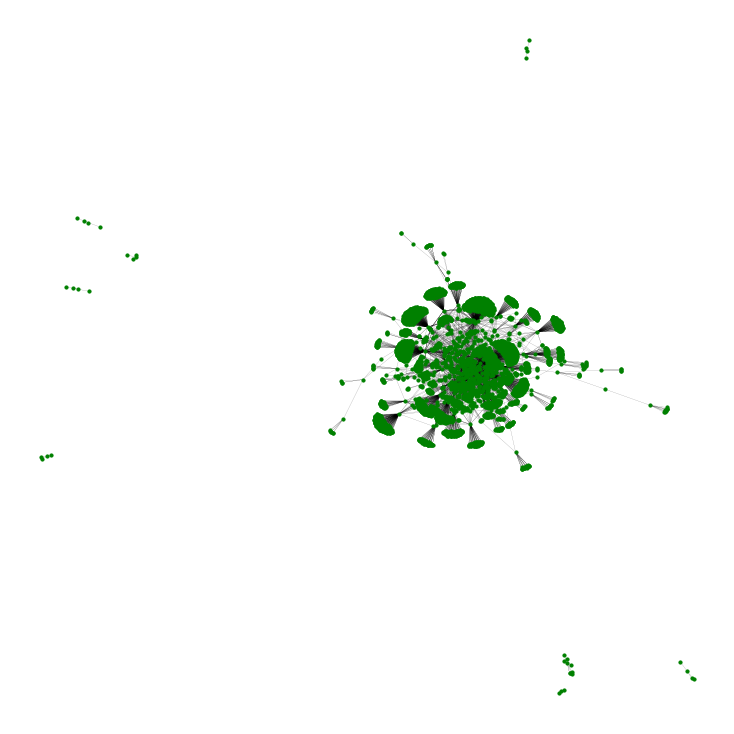

In [3]:
options = {
    'node_color': 'green',
    'edge_color': 'black',
    'node_size': 10,
    'width': 0.1,
    'alpha': 1,
}
plt.figure(figsize=(10,10))
nx.draw(G, **options, with_labels=False)

In [4]:
#Number of edges
E = G.number_of_edges()
print('Number of edges:', E)

Number of edges: 4966


In [5]:
#Number of nodes
V = G.number_of_nodes()
print('Number of nodes:', V)

Number of nodes: 3782


In [6]:
#Graph density
print('Graph density:', nx.classes.function.density(G)) 

Graph density: 0.0006945579857314908


In [7]:
#Global clustering co-efficient
clustering_coefficients = []
global_clustering_coefficients = nx.clustering(G)
#df_gcc = DataFrame(columns={'node', 'clustering_coefficient'})
for node, cc in global_clustering_coefficients.items():
#    df_gcc = df_gcc.append({'node': node, 'clustering_coefficient': cc}, ignore_index=True)
    clustering_coefficients.append({'node': node,
                                    'clustering coefficient': cc})

for row in clustering_coefficients:
    #print('node: {} - Clustering coefficient: {}'.format(row['node'], row['clustering coefficient']))
    print('{}: {}'.format(row['node'], row['clustering coefficient']))

<Main_Page>: 0
4543^^xsd:integer: 0
<http://fa.wikipedia.org/wiki/%D8%B5%D9%81%D8%AD%D9%87%D9%94_%D8%A7%D8%B5%D9%84%DB%8C>: 0
<Wikipedia>: 0.0016806722689075631
49766^^xsd:integer: 0
<http://fa.wikipedia.org/wiki/%D9%88%DB%8C%DA%A9%DB%8C%E2%80%8C%D9%BE%D8%AF%DB%8C%D8%A7>: 0
<2001>: 0.3333333333333333
<Seoul>: 0.3333333333333333
<Spanish_Wikipedia>: 0
<Iranian_languages>: 0
<Slashdot>: 0
<2000>: 0
<Wiktionary>: 0
<Consensus_decision-making>: 0
<Netherlands>: 0
<German_Wikipedia>: 0
<United_Nations>: 0.3888888888888889
<Italian_Wikipedia>: 0
<Wikipedia_Monument>: 0
<Japanese_Wikipedia>: 0
<Amsterdam>: 0
<Japanese_language>: 0
<Linus's_Law>: 0
<March_9>: 0
<Polish_Wikipedia>: 0
<Manuel_Lima>: 0
<The_Guardian>: 0
<Wikibooks>: 0
<Poland>: 0
<English_Wikipedia>: 0
<Wikiquote>: 0
<The_New_York_Times>: 0
<Human_brain>: 0
<2004>: 0.3333333333333333
<Criticism_of_Wikipedia>: 0
<Wikivoyage>: 0
<Project_management>: 0
<Dutch_Wikipedia>: 0
<United_States_dollar>: 0.3333333333333333
<MySQL>: 0
<Wiki

<Hannibal_(Harris_novel)>: 0
<Event_horizon>: 0
<University_of_London>: 0
<Don_Page_(physicist)>: 0
<Reza_Mansouri>: 0
<Amount_of_substance>: 0
<Penrose–Hawking_singularity_theorems>: 0
<Apollo_11>: 0
<Gary_Gibbons>: 0
<Hawking_radiation>: 0
<Republicanism_in_the_United_States>: 0
<Dennis_W._Sciama>: 0
<Roger_Penrose>: 0
<The_Grand_Design_(book)>: 0
<University_of_Oxford>: 0
<General_paresis_of_the_insane>: 0
<Wolf_Prize_in_Physics>: 0
<The_Universe_in_a_Nutshell>: 0
5489^^xsd:integer: 0
<http://fa.wikipedia.org/wiki/%D8%A8%D9%84%D8%AE>: 0
<Rabia_Balkhi>: 0
<Provinces_of_Afghanistan>: 0
<Balkh_Province>: 1.0
<Ancient_Greek>: 0
<Qutayba_ibn_Muslim>: 0
<fa/ابوالمؤید_بلخی>: 0
<Oghuz_Turks>: 0
<Rashid_al-Din_Vatvat>: 0
<Ahnaf_ibn_Qais>: 0
<Amr_ibn_al-Layth>: 0
<Latin>: 0.3333333333333333
<Mazar-i-Sharif>: 0.08067226890756303
70220^^xsd:integer: 0
<http://fa.wikipedia.org/wiki/%D8%A7%D8%B3%DA%A9%D9%86%D8%AF%D8%B1>: 0
<Arachosia>: 0
<Alexander_of_Lyncestis>: 0
<Macedonia_(ancient_kingdom)>: 

In [8]:
#Average degree
avg_degree = 2*E/V
print('Average degree:', avg_degree)

Average degree: 2.626123744050767


In [9]:
#Diameter
subgraph_list = []

for conn_component in nx.connected_components(G):
    subgraph_list.append(conn_component)

print('Number of subgraphs: {}'.format(len(subgraph_list)))

for i in range (len(subgraph_list)):
    subgraph = nx.Graph()
    node_list = list(subgraph_list[i])
    for node in node_list:
        subgraph.add_edges_from(G.edges(node))
    
    print('Subgraph_{} diameter : {}'.format(i+1, nx.diameter(subgraph)))


Number of subgraphs: 9
Subgraph_1 diameter : 10
Subgraph_2 diameter : 2
Subgraph_3 diameter : 2
Subgraph_4 diameter : 2
Subgraph_5 diameter : 2
Subgraph_6 diameter : 2
Subgraph_7 diameter : 2
Subgraph_8 diameter : 2
Subgraph_9 diameter : 2


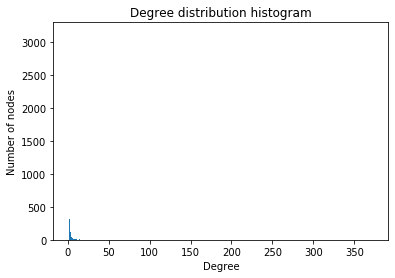

<Figure size 1080x1080 with 0 Axes>

Max degree: 373
Counter({1: 3139, 2: 322, 3: 119, 4: 44, 5: 28, 6: 16, 8: 12, 10: 9, 7: 7, 9: 7, 14: 5, 12: 4, 15: 3, 16: 3, 18: 3, 20: 3, 32: 3, 34: 3, 48: 3, 76: 3, 11: 2, 13: 2, 19: 2, 44: 2, 69: 2, 17: 1, 22: 1, 24: 1, 26: 1, 27: 1, 29: 1, 31: 1, 33: 1, 35: 1, 36: 1, 43: 1, 45: 1, 53: 1, 57: 1, 60: 1, 62: 1, 65: 1, 72: 1, 83: 1, 84: 1, 85: 1, 87: 1, 97: 1, 102: 1, 113: 1, 119: 1, 162: 1, 164: 1, 174: 1, 176: 1, 214: 1, 227: 1, 248: 1, 270: 1, 360: 1, 373: 1})


In [10]:
#Degree distribution
degrees = [G.degree(n) for n in G.nodes()]
degrees.sort()
degree_distribution = collections.Counter(degrees)
plt.hist(degrees, bins=max(degrees))
plt.title('Degree distribution histogram')
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.figure(figsize=(15,15))
plt.show()
print('Max degree: {}'.format(max(degrees)))
print(degree_distribution)
#for degree in degree_distribution:
#    print('{} : {}'.format(degree, degree_distribution[degree]))

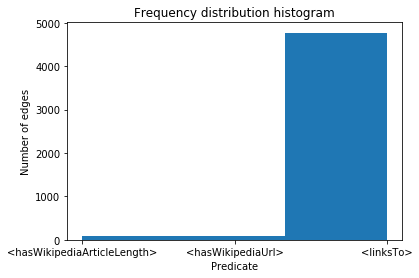

<Figure size 1080x1080 with 0 Axes>

Predicate with maximum frequency: <linksTo>
<hasWikipediaArticleLength> : 97
<hasWikipediaUrl> : 97
<linksTo> : 4772


In [11]:

#Frequency distribution
predicate_list = [c for a,b,c in G.edges.data('predicate')]
freq_distribution = collections.Counter(predicate_list)
plt.hist(predicate_list, bins=len(set(predicate_list)))
plt.title('Frequency distribution histogram')
plt.xlabel('Predicate')
plt.ylabel('Number of edges')
#for index,data in enumerate(predicate_list):
#    plt.text(x=index, y =data+1, s=f'{data}', fontdict=dict(fontsize=20))
plt.figure(figsize=(15,15))
plt.show()
print('Predicate with maximum frequency: {}'.format(max(predicate_list)))
for predicate in freq_distribution:
    print('{} : {}'.format(predicate, freq_distribution[predicate]))


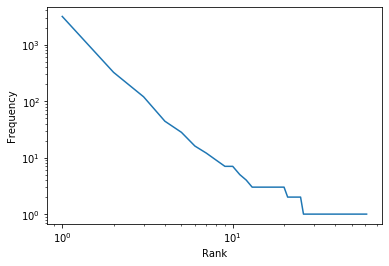

In [12]:
#rank-frequency plot
rf_table = []
degree = []
frequency = []
degree_distribution_list = degree_distribution.most_common(len(degree_distribution))
top_frequency = degree_distribution_list[0][1]
for index, item in enumerate(degree_distribution_list, start=1):
    rf_table.append({'rank': index,
                     'degree': item[0],
                     'frequency': item[1],
                     'relative frequency':'1/{}'.format(index)})
    
freq_list = list(degree_distribution.values())

rank = [row['rank'] for row in rf_table]
freq = [row['frequency'] for row in rf_table]

plt.xlabel("Rank")
plt.ylabel("Frequency")
plt.loglog(rank, freq, basex=10)

for row in rf_table:
    print('rank')

In [14]:
print("|  Rank    |  degree    |  Frequency |Zipf fraction|")
format_string = "|{:10}|{:12}|{:12.0f}|{:>12}|"
for index, item in enumerate(rf_table, start=1):
    print(format_string.format(item["rank"],
                               item["degree"],
                               item["frequency"],
                               item["relative frequency"]))

|  Rank    |  degree    |  Frequency |Zipf fraction|
|         1|           1|        3139|         1/1|
|         2|           2|         322|         1/2|
|         3|           3|         119|         1/3|
|         4|           4|          44|         1/4|
|         5|           5|          28|         1/5|
|         6|           6|          16|         1/6|
|         7|           8|          12|         1/7|
|         8|          10|           9|         1/8|
|         9|           7|           7|         1/9|
|        10|           9|           7|        1/10|
|        11|          14|           5|        1/11|
|        12|          12|           4|        1/12|
|        13|          15|           3|        1/13|
|        14|          16|           3|        1/14|
|        15|          18|           3|        1/15|
|        16|          20|           3|        1/16|
|        17|          32|           3|        1/17|
|        18|          34|           3|        1/18|
|        19